In [3]:
!pip install spacy==3.0.6

In [4]:
import pandas as pd
import glob
import json

In [5]:
data_path = '/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data'

### Sentenze Penali Cassazione
http://www.italgiure.giustizia.it/sncass/ 

In [ ]:
pdf1 = pd.read_csv(data_path +'/sentenze_penale_pdf.csv')
pdf2 = pd.read_csv(data_path +'/sentenze_penale_pdf2.csv')

In [ ]:
pdfs = pd.concat([pdf1,pdf2])

In [ ]:
pdfs

,link,text
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...
...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...


In [ ]:
pdfs['text'].nunique()

216

In [ ]:
pdfs['chars'] = pdfs['text'].apply(len)
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...,47626
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


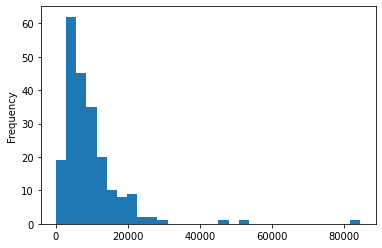

In [ ]:
pdfs['chars'].plot.hist(bins=30)

In [ ]:
pdfs = pdfs[pdfs['chars']<40000]
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [ ]:
pdfs[pdfs['chars'] <200]

,link,text,chars
14,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46388 Anno 2021Pre...,124
17,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46138 Anno 2021Pre...,134
37,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46416 Anno 2021Pre...,125
65,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46876 Anno 2021Pre...,130
83,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46410 Anno 2021Pre...,123
86,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46135 Anno 2021Pre...,116
99,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 45839 Anno 2021Pre...,120
116,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 3 Num. 46817 Anno 2021Pre...,119
135,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46758 Anno 2021Pre...,127
140,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46156 Anno 2021Pre...,124


In [ ]:
#Remove the lines that have a short text that correspond to judgments in the darkening phase
pdfs = pdfs[pdfs['chars'] > 200]

In [ ]:
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [ ]:
df['subtext'] = df['text'].apply(lambda x:x[:7000])
df

,link,text,chars,subtext
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104,SENTENZA sul ricorso proposto dal Procuratore ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176,SENTENZA sul ricorso proposto da: IULIANO NADI...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557,SENTENZA sui ricorsi proposti da: BORSAN MARIC...
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112,SENTENZA sul ricorso proposto da: PATRUNO GIUS...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251,SENTENZA sul ricorso proposto da: HERRERA ARA ...
...,...,...,...,...
195,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949,SENTENZA sul ricorso proposto da Mastrogiacomo...
196,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973,SENTENZA sul ricorso proposto da Aliotta Andre...
197,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723,letta la requisitoria del Procuratore Generale...
198,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649,SENTENZA sul ricorso proposto dal Procuratore ...


In [ ]:
df.to_csv(data_path +'/sentenze_penali_clean.csv', index = False)

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
df

,link,text,chars,subtext
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104,SENTENZA sul ricorso proposto dal Procuratore ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176,SENTENZA sul ricorso proposto da: IULIANO NADI...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557,SENTENZA sui ricorsi proposti da: BORSAN MARIC...
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112,SENTENZA sul ricorso proposto da: PATRUNO GIUS...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251,SENTENZA sul ricorso proposto da: HERRERA ARA ...
...,...,...,...,...
195,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949,SENTENZA sul ricorso proposto da Mastrogiacomo...
196,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973,SENTENZA sul ricorso proposto da Aliotta Andre...
197,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723,letta la requisitoria del Procuratore Generale...
198,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649,SENTENZA sul ricorso proposto dal Procuratore ...


### Annotation

Use this web tool https://abera87.github.io/annotate/ from this paper https://arxiv.org/pdf/2108.08184.pdf

First sample

In [ ]:
sample_1 = df.head(26)

In [ ]:
txt = " \n ".join(s.lower() for s in sample_1['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_1.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [4]:
s1 = pd.read_json(data_path + '/Output.json').head(27)
s1

,SentId,SentText,EntityMentions,RelationMentions
0,0,sentenza sul ricorso proposto dal procuratore ...,"[tiziana casale, giuseppina anna rosaria pacil...","[{'Arg1Text': 'tiziana casale', 'Arg2Text': 't..."
1,1,sentenza sul ricorso proposto da: iuliano nad...,"[difensore, iuliano]","[{'Arg1Text': 'difensore', 'Arg2Text': 'iulian..."
2,2,sentenza sui ricorsi proposti da: borsan mari...,"[difensore, procura generale, borsan, socio]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,sentenza sul ricorso proposto da: patruno giu...,"[corte di appello, difensore, procura generale...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,sentenza sul ricorso proposto da: herrera ara...,"[pirro antonella, difensore, tribunale di mila...","[{'Arg1Text': 'herrera ara luis', 'Arg2Text': ..."
5,5,sentenza sui ricorsi proposti da: levakovic m...,"[la corte di appello, procura generale, levako...","[{'Arg1Text': 'la corte di appello', 'Arg2Text..."
6,6,sentenza sul ricorso proposto da: giugno dari...,"[difensore, tribunale di brescia, corte territ...","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,7,sentenza sul ricorso proposto da: merletti er...,"[difensore, procura generale, merletti]","[{'Arg1Text': 'difensore', 'Arg2Text': 'merlet..."
8,8,sentenza sul ricorso proposto da pelle sebast...,"[alfredo giovinazzo, francesco saverio fortuna...","[{'Arg1Text': 'alfredo giovinazzo', 'Arg2Text'..."
9,9,sentenza sul ricorso proposto da parrinello v...,"[domenico infantino, difensore, corte di appel...","[{'Arg1Text': 'domenico infantino', 'Arg2Text'..."


Second sample

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
sample_2 = df[df.index >26].head(23)
sample_2

,link,text,chars,subtext
27,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: DE ROSA GIUS...,8452,SENTENZA sul ricorso proposto da: DE ROSA GIUS...
28,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: TESTA SILVIO...,4606,SENTENZA sul ricorso proposto da: TESTA SILVIO...
29,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: TOGNAZZI IVA...,4101,SENTENZA sul ricorso proposto da: TOGNAZZI IVA...
30,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PROCURATORE ...,3409,SENTENZA sul ricorso proposto da: PROCURATORE ...
31,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: BEN JAFER IS...,8321,SENTENZA sul ricorso proposto da: BEN JAFER IS...
32,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATTI CALOGE...,8241,SENTENZA sul ricorso proposto da: PATTI CALOGE...
33,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PALUMBO SAVE...,8722,SENTENZA sul ricorso proposto da: PALUMBO SAVE...
34,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: RAMETTA FABR...,9009,SENTENZA sul ricorso proposto da: RAMETTA FABR...
35,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: PISANIELLO R...,12990,SENTENZA sui ricorsi proposti da: PISANIELLO R...
36,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: FERRARA LUIG...,8302,SENTENZA sul ricorso proposto da: FERRARA LUIG...


In [ ]:
txt = " \n ".join(s.lower() for s in sample_2['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_2.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s2 = pd.read_json(data_path + '/Output_2.json')
s2

,SentId,SentText,EntityMentions,RelationMentions
0,0,sentenza sul ricorso proposto da: de rosa gius...,"[de rosa, kate, tognozzi, difensore]","[{'Arg1Text': 'kate', 'Arg2Text': 'de rosa', '..."
1,1,sentenza sul ricorso proposto da: testa silvi...,"[testa, difensore, corte di cassazione]","[{'Arg1Text': 'difensore', 'Arg2Text': 'testa'..."
2,2,sentenza sul ricorso proposto da: tognazzi iv...,"[tognazzi, tribunale, difensore]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'tognaz..."
3,3,sentenza sul ricorso proposto da: procuratore...,"[ouriniche, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'ourini..."
4,4,sentenza sul ricorso proposto da: ben jafer i...,"[ben jafer, tribunale, difensore]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'ben ja..."
5,5,sentenza sul ricorso proposto da: patti calog...,"[patti, giuseppina fodaroni, corte d'appello]","[{'Arg1Text': 'giuseppina fodaroni', 'Arg2Text..."
6,6,sentenza sul ricorso proposto da: palumbo sav...,"[palumbo, corte d'appello, difensore]","[{'Arg1Text': 'corte d'appello', 'Arg2Text': '..."
7,7,sentenza sul ricorso proposto da: rametta fab...,"[rametta, corte d'appello, difensore]","[{'Arg1Text': 'corte d'appello', 'Arg2Text': '..."
8,8,sentenza sui ricorsi proposti da: pisaniello ...,"[pisaniello, ilario, giaquinto, kate tassone, ...","[{'Arg1Text': 'kate tassone', 'Arg2Text': 'pis..."
9,9,sentenza sul ricorso proposto da: ferrara lui...,"[ferrara, kate tassone, corte d'appello, avv. ...","[{'Arg1Text': 'kate tassone', 'Arg2Text': 'fer..."


In [ ]:
data_annotated = pd.concat([s1,s2])
data_annotated.reset_index(inplace = True,drop= True)
data_annotated

,SentId,SentText,EntityMentions,RelationMentions
0,0,sentenza sul ricorso proposto dal procuratore ...,"[tiziana casale, giuseppina anna rosaria pacil...","[{'Arg1Text': 'tiziana casale', 'Arg2Text': 't..."
1,1,sentenza sul ricorso proposto da: iuliano nad...,"[difensore, iuliano]","[{'Arg1Text': 'difensore', 'Arg2Text': 'iulian..."
2,2,sentenza sui ricorsi proposti da: borsan mari...,"[difensore, procura generale, borsan, socio]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,sentenza sul ricorso proposto da: patruno giu...,"[corte di appello, difensore, procura generale...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,sentenza sul ricorso proposto da: herrera ara...,"[pirro antonella, difensore, tribunale di mila...","[{'Arg1Text': 'herrera ara luis', 'Arg2Text': ..."
5,5,sentenza sui ricorsi proposti da: levakovic m...,"[la corte di appello, procura generale, levako...","[{'Arg1Text': 'la corte di appello', 'Arg2Text..."
6,6,sentenza sul ricorso proposto da: giugno dari...,"[difensore, tribunale di brescia, corte territ...","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,7,sentenza sul ricorso proposto da: merletti er...,"[difensore, procura generale, merletti]","[{'Arg1Text': 'difensore', 'Arg2Text': 'merlet..."
8,8,sentenza sul ricorso proposto da pelle sebast...,"[alfredo giovinazzo, francesco saverio fortuna...","[{'Arg1Text': 'alfredo giovinazzo', 'Arg2Text'..."
9,9,sentenza sul ricorso proposto da parrinello v...,"[domenico infantino, difensore, corte di appel...","[{'Arg1Text': 'domenico infantino', 'Arg2Text'..."


In [ ]:
data_annotated.drop('SentId',axis = 1, inplace = True)

In [ ]:
data_annotated.iloc[4]['RelationMentions']

[{'Arg1Text': 'herrera ara luis',
  'Arg2Text': 'herrera ara',
  'RelationNames': ['/difende/avvocato/cliente']},
 {'Arg1Text': 'difensore',
  'Arg2Text': 'herrera ara',
  'RelationNames': ['/difende/avvocato/cliente']},
 {'Arg1Text': 'tribunale di milano',
  'Arg2Text': 'herrera ara',
  'RelationNames': ['/giudica/giudice/imputato']}]

In [ ]:
data_annotated.iloc[4]['RelationMentions'] = data_annotated.iloc[4]['RelationMentions'][1:]

In [ ]:
data_annotated.iloc[4]['RelationMentions']

[{'Arg1Text': 'difensore',
  'Arg2Text': 'herrera ara',
  'RelationNames': ['/difende/avvocato/cliente']},
 {'Arg1Text': 'tribunale di milano',
  'Arg2Text': 'herrera ara',
  'RelationNames': ['/giudica/giudice/imputato']}]

In [ ]:
def remove_repetition(lista):
    lista_new = []
    for x in lista:
        contenuto = []
        for s in lista:
            if x != s:
                contenuto.append(x in s)
        if not (True in contenuto):
            lista_new.append(x)
    return lista_new

In [ ]:
remove_repetition(data_annotated.iloc[13]['EntityMentions'])

['difensore', 'corte di appello', 'perla lori', 'de leo']

In [ ]:
data_annotated['EntityMentions'] = data_annotated['EntityMentions'].apply(remove_repetition)

In [ ]:
data_annotated.iloc[13]['EntityMentions']

['difensore', 'corte di appello', 'perla lori', 'de leo']

In [69]:
data_annotated

,SentText,EntityMentions,RelationMentions
0,sentenza sul ricorso proposto dal procuratore ...,"[tiziana casale, giuseppina anna rosaria pacil...","[{'Arg1Text': 'tiziana casale', 'Arg2Text': 't..."
1,sentenza sul ricorso proposto da: iuliano nadi...,"[difensore, iuliano]","[{'Arg1Text': 'difensore', 'Arg2Text': 'iulian..."
2,sentenza sui ricorsi proposti da: borsan maric...,"[difensore, procura generale, borsan, socio]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,sentenza sul ricorso proposto da: patruno gius...,"[corte di appello, difensore, procura generale...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,sentenza sul ricorso proposto da: herrera ara ...,"[pirro antonella, difensore, tribunale di mila...","[{'Arg1Text': 'difensore', 'Arg2Text': 'herrer..."
5,sentenza sui ricorsi proposti da: levakovic mi...,"[la corte di appello, procura generale, levako...","[{'Arg1Text': 'la corte di appello', 'Arg2Text..."
6,sentenza sul ricorso proposto da: giugno dario...,"[difensore, tribunale di brescia, corte territ...","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,sentenza sul ricorso proposto da: merletti erc...,"[difensore, procura generale, merletti]","[{'Arg1Text': 'difensore', 'Arg2Text': 'merlet..."
8,sentenza sul ricorso proposto da pelle sebasti...,"[alfredo giovinazzo, francesco saverio fortuna...","[{'Arg1Text': 'alfredo giovinazzo', 'Arg2Text'..."
9,sentenza sul ricorso proposto da parrinello vi...,"[domenico infantino, difensore, corte di appel...","[{'Arg1Text': 'domenico infantino', 'Arg2Text'..."


I have to replace avv. with avv

In [ ]:
def remove_points_from_relations(relations):
    rel_list = []
    for rel in relations:
        rel['Arg1Text'] = rel['Arg1Text'].replace("'"," ")
        rel['Arg2Text'] = rel['Arg2Text'].replace("'"," ")
        rel_list.append(rel)
    return rel_list

In [ ]:
data_annotated['EntityMentions'] = data_annotated['EntityMentions'].apply(lambda row: [e.replace("'"," ") for e in row])
data_annotated['SentText'] = data_annotated['SentText'].apply(lambda x: x.replace("'"," "))
data_annotated['RelationMentions'] = data_annotated['RelationMentions'].apply(remove_points_from_relations)


In [76]:
data_annotated['SentText'] = data_annotated['SentText'].apply(lambda x: x.lstrip())

In [66]:
data_annotated = data_annotated.drop(index=23).reset_index(drop = True)
data_annotated

,SentText,EntityMentions,RelationMentions
0,sentenza sul ricorso proposto dal procuratore ...,"[tiziana casale, giuseppina anna rosaria pacil...","[{'Arg1Text': 'tiziana casale', 'Arg2Text': 't..."
1,sentenza sul ricorso proposto da: iuliano nadi...,"[difensore, iuliano]","[{'Arg1Text': 'difensore', 'Arg2Text': 'iulian..."
2,sentenza sui ricorsi proposti da: borsan maric...,"[difensore, procura generale, borsan, socio]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,sentenza sul ricorso proposto da: patruno gius...,"[corte di appello, difensore, procura generale...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,sentenza sul ricorso proposto da: herrera ara ...,"[pirro antonella, difensore, tribunale di mila...","[{'Arg1Text': 'difensore', 'Arg2Text': 'herrer..."
5,sentenza sui ricorsi proposti da: levakovic mi...,"[la corte di appello, procura generale, levako...","[{'Arg1Text': 'la corte di appello', 'Arg2Text..."
6,sentenza sul ricorso proposto da: giugno dario...,"[difensore, tribunale di brescia, corte territ...","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,sentenza sul ricorso proposto da: merletti erc...,"[difensore, procura generale, merletti]","[{'Arg1Text': 'difensore', 'Arg2Text': 'merlet..."
8,sentenza sul ricorso proposto da pelle sebasti...,"[alfredo giovinazzo, francesco saverio fortuna...","[{'Arg1Text': 'alfredo giovinazzo', 'Arg2Text'..."
9,sentenza sul ricorso proposto da parrinello vi...,"[domenico infantino, difensore, corte di appel...","[{'Arg1Text': 'domenico infantino', 'Arg2Text'..."


In [67]:
data_annotated.to_json(data_path +'/manually_annotated_dataset.json')

In [68]:
data_annotated = pd.read_json(data_path +'/manually_annotated_dataset.json')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_annotated, dev_test = train_test_split(data_annotated, test_size=0.3)
dev_annotated, test_annotated = train_test_split(dev_test, test_size=0.5)

I have to convert this dataframe into a tsv file

In [69]:
import re
def pad(text):
    text = re.sub("([.,!?(')])", r' \1 ', text)
    text = re.sub('\s{2,}', ' ', text)
    return text

In [70]:
def get_tokens(text):
    tokens = pad(text).split(' ')
    return tokens

In [79]:
def nearest_entities(text, e1, e2):
    occ1 = [i for i in range(len(text)) if text.startswith(e1 , i)]
    occ2 = [i for i in range(len(text)) if text.startswith(e2, i)]
    
    minimum = len(text)
    indexes = (0,0)

    for i1,v1 in enumerate(occ1):
        for i2,v2 in enumerate(occ2):
            if abs(v1-v2) < minimum:
                minimum = abs(v1-v2)
                
                indexes = (i1,i2)
    tok_list = get_tokens(text)
    occ1_tokens = []
    for i,x in enumerate(tok_list):
        if len(get_tokens(e1)) == 1:
            if x == get_tokens(e1)[0]:
                occ1_tokens.append(i)
        else:
            if x == get_tokens(e1)[0] and tok_list[i+1] == get_tokens(e1)[1]:
                occ1_tokens.append(i)
    occ2_tokens = []
    for i,x in enumerate(tok_list):
        if len(get_tokens(e2)) == 1:
            if x == get_tokens(e2)[0]:
                occ2_tokens.append(i)
        else:
            if x == get_tokens(e2)[0] and tok_list[i+1] == get_tokens(e2)[1]:
                occ2_tokens.append(i)

   
    
    return occ1[indexes[0]], occ2[indexes[1]], occ1_tokens[indexes[0]], occ2_tokens[indexes[1]]
            


In [72]:
def create_dict(df_row):
    tokens_list = get_tokens(df_row['SentText'])
    text = df_row['SentText']
    diz = {"document" : text,
           "tokens": [],
           "relations" : []}
    entities_list = []
    for rel in df_row['RelationMentions']:
        entity_1 = rel['Arg1Text']
        entity_2 = rel['Arg2Text']
         
        tupla = nearest_entities(text, entity_1, entity_2)
        #print(tupla)


        if entity_1 not in df_row['EntityMentions'] or entity_1 not in df_row['EntityMentions']:
            pass
        ent1_diz = {"text": entity_1,
                                "start": tupla[0],
                                "end": tupla[0] + len(entity_1),
                                "token_start": tupla[2],
                                "token_end": tupla[2] + len(get_tokens(entity_1)) -1,
                                "entityLabel": rel['RelationNames'][0].split('/')[2].upper()}
        
        diz['tokens'].append(ent1_diz)
        entities_list.append(entity_1)

        ent2_diz = {"text": entity_2,
                                "start": tupla[1],
                                "end": tupla[1] + len(entity_2),
                                "token_start": tupla[3],
                                "token_end": tupla[3] + len(get_tokens(entity_2)) -1,
                                "entityLabel": 'IMPUTATO'}
       
        diz['tokens'].append(ent2_diz)
        entities_list.append(entity_2)
        
        diz['relations'].append({ "child": ent2_diz["token_start"], "head": ent1_diz["token_start"], "relationLabel": rel['RelationNames'][0].split('/')[1].upper() })
    return diz

In [82]:
import json
def transform_json(df,filename):
    output = []
    for i in range(df.shape[0]):
        output.append(create_dict(df.iloc[i]))
    with open(data_path + f'/{filename}.txt', 'w') as fout:
        json.dump(output, fout)


In [83]:
transform_json(data_annotated, 'prova')

In [86]:
max_distance = 0
for i in range(df.shape[0]):
    for diz in df.iloc[i]['relations']:
        m = diz['head'] - diz['child']
        if m > max_distance:
            max_distance = m
            print(i)
           
        

print(max_distance)

1
2
2
3
10
15
20
448


In [91]:
df = pd.read_json(data_path +'/prova.txt')
df.head()

,document,tokens,relations
0,sentenza sul ricorso proposto dal procuratore ...,"[{'text': 'tiziana casale', 'start': 516, 'end...","[{'child': 93, 'head': 88, 'relationLabel': 'D..."
1,sentenza sul ricorso proposto da: iuliano nadi...,"[{'text': 'difensore', 'start': 2136, 'end': 2...","[{'child': 372, 'head': 376, 'relationLabel': ..."
2,sentenza sui ricorsi proposti da: borsan maric...,"[{'text': 'difensore', 'start': 719, 'end': 72...","[{'child': 123, 'head': 132, 'relationLabel': ..."
3,sentenza sul ricorso proposto da: patruno gius...,"[{'text': 'corte di appello', 'start': 475, 'e...","[{'child': 83, 'head': 72, 'relationLabel': 'G..."
4,sentenza sul ricorso proposto da: herrera ara ...,"[{'text': 'difensore', 'start': 1448, 'end': 1...","[{'child': 82, 'head': 268, 'relationLabel': '..."


In [ ]:
transform_json(train_annotated, 'relation_training')
transform_json(test_annotated, 'relation_test')
transform_json(dev_annotated, 'relation_dev')

In [92]:
import json


from pathlib import Path

from spacy.tokens import Span, DocBin, Doc
from spacy.vocab import Vocab
from wasabi import Printer
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from spacy.util import compile_infix_regex
import re
import spacy

nlp = spacy.blank("en")
# Create a blank Tokenizer with just the English vocab

msg = Printer()

SYMM_LABELS = ["Binds"]
MAP_LABELS = {
    "DIFENDE": "DIFENDE",
    "GIUDICA": "GIUDICA"
}


def main(json_loc: Path, output_file: Path):
    """Creating the corpus from the Prodigy annotations."""
    Doc.set_extension("rel", default={},force=True)
    vocab = Vocab()

    docs = {"train": [], "dev": [], "test": [], "total": []}
    ids = {"train": set(), "dev": set(), "test": set(), "total":set()}
    count_all = {"train": 0, "dev": 0, "test": 0,"total": 0}
    count_pos = {"train": 0, "dev": 0, "test": 0,"total": 0}

    with open(json_loc, encoding="utf8") as jsonfile:
        file = json.load(jsonfile)
        i = 0
        for example in file:
            span_starts = set()
            neg = 0
            pos = 0
                    # Parse the tokens
            tokens=nlp(example["document"])    

            spaces=[]
            spaces = [True if tok.whitespace_ else False for tok in tokens]
            words = [t.text for t in tokens]
            doc = Doc(nlp.vocab, words=words, spaces=spaces)


            # Parse the GGP entities
            spans = example["tokens"]
            entities = []
            span_end_to_start = {}
            for span in spans:
                entity = doc.char_span(
                     span["start"], span["end"], label=span["entityLabel"]
                 )
                

                span_end_to_start[span["token_start"]] = span["token_start"]
                #print(span_end_to_start)
                entities.append(entity)
                span_starts.add(span["token_start"])
            #print(entities)
            doc.ents = entities
            #print(i)
            #i += 1

            # Parse the relations
            rels = {}
            for x1 in span_starts:
                for x2 in span_starts:
                    rels[(x1, x2)] = {}
                    #print(rels)
            relations = example["relations"]
            #print(len(relations))
            for relation in relations:
                # the 'head' and 'child' annotations refer to the end token in the span
                # but we want the first token
                start = span_end_to_start[relation["head"]]
                end = span_end_to_start[relation["child"]]
                label = relation["relationLabel"]
                #print(rels[(start, end)])
                #print(label)
                #label = MAP_LABELS[label]
                if label not in rels[(start, end)]:
                    rels[(start, end)][label] = 1.0
                    pos += 1
                    #print(pos)
                    #print(rels[(start, end)])

            # The annotation is complete, so fill in zero's where the data is missing
            for x1 in span_starts:
                for x2 in span_starts:
                    for label in MAP_LABELS.values():
                        if label not in rels[(x1, x2)]:
                            neg += 1
                            rels[(x1, x2)][label] = 0.0

                            #print(rels[(x1, x2)])
            doc._.rel = rels
            #print(doc._.rel)

            # only keeping documents with at least 1 positive case
            if pos > 0:
                    docs["total"].append(doc)
                    count_pos["total"] += pos
                    count_all["total"] += pos + neg

                    
                    
    #print(len(docs["total"]))
    docbin = DocBin(docs=docs["total"], store_user_data=True)
    docbin.to_disk(output_file)
    msg.info(
        f"{len(docs['total'])} training sentences"
    )
    print(docs)

In [94]:
prova_out = data_path + '/relations_prova.spacy'

In [ ]:
train_file = data_path + '/relations_training.spacy'
dev_file = data_path + '/relations_dev.spacy'
test_file = data_path + '/relations_test.spacy'

In [95]:
main(data_path +'/prova.txt', prova_out)

ValueError: ignored

In [ ]:
main(data_path +'/relation_test.txt', test_file)

ℹ 8 training sentences
{'train': [], 'dev': [], 'test': [], 'total': [ sentenza sul ricorso proposto da: ciavarroni alessandro, nato a terni il 21/06/1976 avverso la sentenza del 18/09/2020 della corte appello di perugia visti gli atti, il provvedimento impugnato e il ricorso; udita la relazione svolta dal consigliere teresa liuni; letta la requisitoria scritta del procuratore generale, franca zacco, tempestivamente inviata ai sensi dell art. 23, comma 8, d.l. n. 137/2020, con la quale si chiede la declaratoria di inammissibilità del ricorso. penale sent. sez. 1   num. 47177  anno 2021presidente: casa filipporelatore: liuni teresadata udienza: 14/12/2021ritenuto in fatto e considerato in diritto 1. con sentenza del 18/9/2020, la corte di appello di perugia ha confer-mato la sentenza del giudice monocratico del tribunale di terni del 19/10/2018, che aveva condannato alessandro ciavarroni alla pena di un anno di reclusione per il reato ex art. 75, comma 2, d. lgs n. 159 del 2011. 2. avve

In [ ]:
main(data_path +'/relation_dev.txt', dev_file)

ℹ 7 training sentences
{'train': [], 'dev': [], 'test': [], 'total': [sentenza sul ricorso proposto da: de rosa giuseppe nato a roma il 27/07/1944 avverso l ordinanza del 27/04/2021 del trib. liberta  di roma udita la relazione svolta dal consigliere maura nardin il procuratore generale, nella persona del sostituto procuratore kate tassone conclude per il rigetto e  presente l avvocato tognozzi gianluca del foro di roma in difesa di: de rosa giuseppe il difensore presente chiede l accoglimento del ricorso e  presente come sostituto processuale con delega orale dell avvocato cardosi francesco maria del foro di roma in difesa di: de rosa giuseppe l avv fiduccia alessandra. il difensore presente chiede l accoglimento del ricorso penale sent. sez. 4   num. 46849  anno 2021presidente: piccialli patriziarelatore: nardin mauradata udienza: 14/12/2021ritenuto in fatto 1. con ordinanza in data 27 aprile 2021 il tribunale per il riesame di roma, resa in sede di rinvio, a seguito dell annullament

## Sentenze Giustizia Ammnistrativa
https://www.giustizia-amministrativa.it/web/guest/dcsnprr

In [ ]:
htmls = pd.read_csv(data_path +'/sentenze_html.csv')
htmls

In [ ]:
htmls['text'].nunique()